In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind
from utils.const import DTYPES_DICT,CANDIDATES,NUM_COLUMNS  
from utils.func import prepare_results_data2020, prepare_trusttee_presence_data2020, prepare_gus_population

pd.set_option('display.max_columns', 50)

#### election results loaded

In [149]:
election_1_df = prepare_results_data2020(r"..\data\wybory_2020\wyniki1tura.csv")

election_2_df = prepare_results_data2020(r"..\data\wybory_2020\wyniki2tura.csv")

election_1_df['turn'] = '1'
election_2_df['turn'] = '2'

results_2020 = pd.concat([election_1_df, election_2_df], ignore_index=True) 

c:\Users\kgrab\Desktop\stacjaIT_analiza_wyborcza\notebooks\utils\func.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[c].fillna(0)


In [150]:
election_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25433 entries, 0 to 25432
Data columns (total 45 columns):
 #   Column                                                                                         Non-Null Count  Dtype 
---  ------                                                                                         --------------  ----- 
 0   Symbol kontrolny                                                                               25433 non-null  object
 1   Nr OKW                                                                                         25433 non-null  object
 2   Kod TERYT                                                                                      25433 non-null  object
 3   Typ gminy                                                                                      25433 non-null  object
 4   Numer obwodu                                                                                   25433 non-null  object
 5   Typ obszaru              

In [151]:
election_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25433 entries, 0 to 25432
Data columns (total 36 columns):
 #   Column                                                                                         Non-Null Count  Dtype 
---  ------                                                                                         --------------  ----- 
 0   Symbol kontrolny                                                                               25433 non-null  object
 1   Nr OKW                                                                                         25433 non-null  object
 2   Kod TERYT                                                                                      25433 non-null  object
 3   Typ gminy                                                                                      25433 non-null  object
 4   Numer obwodu                                                                                   25433 non-null  object
 5   Typ obszaru              

#### trust tee analisys

In [152]:
trustree1 = prepare_trusttee_presence_data2020(r'..\data\wybory_2020\maz_zaufania_1_tura.xlsx')
trustree2 = prepare_trusttee_presence_data2020(r'..\data\wybory_2020\maz_zaufania.xlsx')

trustree1['turn'] = '1'
trustree2['turn'] = '2'

In [153]:
trustree1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Kod TERYT            27227 non-null  object
 1   Numer obwodu         27227 non-null  object
 2   Typ obwodu           27227 non-null  object
 3   Siedziba             27227 non-null  object
 4   Gmina                27227 non-null  object
 5   Powiat               27227 non-null  object
 6   Województwo          27227 non-null  object
 7   maz_zaufania_obezny  27227 non-null  int64 
 8   czy_maz              27227 non-null  int64 
 9   turn                 27227 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.1+ MB


In [154]:
trustree2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27229 entries, 0 to 27228
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Kod TERYT            27229 non-null  object
 1   Numer obwodu         27229 non-null  object
 2   Typ obwodu           27229 non-null  object
 3   Siedziba             27229 non-null  object
 4   Gmina                27229 non-null  object
 5   Powiat               27229 non-null  object
 6   Województwo          27229 non-null  object
 7   maz_zaufania_obezny  27229 non-null  int64 
 8   czy_maz              27229 non-null  int64 
 9   turn                 27229 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.1+ MB


In [155]:
trustree_presance_2020 = pd.concat([trustree1,trustree2],ignore_index=True)

#### GUS population dataset

In [156]:
gus_population = prepare_gus_population('..\data\wybory_2020\gus_ludnosc_2020.xlsx')

gus_population

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kgrab\AppData\Local\Temp\ipykernel_55828\861314417.py:1: SyntaxWarning: invalid escape sequence '\d'
  gus_population = prepare_gus_population('..\data\wybory_2020\gus_ludnosc_2020.xlsx')


,TERYT,area,population,density
0,020101,24.0,38872.0,NaN
1,020102,289.0,14699.0,NaN
2,020103,268.0,5337.0,NaN
3,020105,437.0,7349.0,NaN
4,020106,110.0,8632.0,NaN
...,...,...,...,...
2490,321703,203.0,5402.0,NaN
2491,321704,250.0,4890.0,NaN
2492,326101,98.0,107048.0,NaN
2493,326201,301.0,401907.0,NaN


In [157]:
gus_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TERYT       2495 non-null   object 
 1   area        2495 non-null   float64
 2   population  2495 non-null   float64
 3   density     0 non-null      float64
dtypes: float64(3), object(1)
memory usage: 78.1+ KB


#### merging data

In [158]:
results_2020.shape

(50866, 45)

In [159]:
results_2020 = results_2020.merge(
    trustree_presance_2020[['Kod TERYT','Numer obwodu','turn','czy_maz']],
    how='left',
    on = ['Kod TERYT','Numer obwodu','turn']
)\
.merge(gus_population, how='left', left_on='Kod TERYT', right_on='TERYT')\
.drop('TERYT', axis=1)

In [160]:
results_2020.isna().sum() /len(results_2020)

Symbol kontrolny                                                                                 0.0
Nr OKW                                                                                           0.0
Kod TERYT                                                                                        0.0
Typ gminy                                                                                        0.0
Numer obwodu                                                                                     0.0
Typ obszaru                                                                                      0.0
Typ obwodu                                                                                       0.0
Siedziba                                                                                         0.0
Gmina                                                                                            0.0
Powiat                                                                                     

In [161]:
for c in results_2020.columns:
    if pd.api.types.is_numeric_dtype(results_2020[c]):
        results_2020[c] = results_2020[c].fillna(0)

In [162]:
results_2020['frekwencja'] = results_2020['Liczba kart wyjętych z urny'] / results_2020['Liczba wyborców uprawnionych do głosowania']
results_2020['proc_niewaznych_glosow'] =  results_2020['Liczba głosów nieważnych'] / results_2020['Liczba kart wyjętych z urny']


results_2020['proc_niewykorz_kart'] = np.where(
    results_2020['Komisje obwodowe otrzymały kart do głosowania'] != 0,
    results_2020['Nie wykorzystano kart do głosowania'] / results_2020['Komisje obwodowe otrzymały kart do głosowania'],
    0
    )

results_2020['proc_x_multi'] = results_2020['x_multi'] / results_2020['Liczba kart wyjętych z urny']

results_2020['proc_odrzucenia_kopert'] = np.where(
    results_2020['Liczba otrzymanych kopert zwrotnych'] != 0,

    (results_2020 ['Liczba kopert zwrotnych, w których nie było oświadczenia o osobistym i tajnym oddaniu głosu'] + \
    results_2020 ['Liczba kopert zwrotnych, w których oświadczenie nie było podpisane'] + \
    results_2020 ['Liczba kopert zwrotnych, w których nie było koperty na kartę do głosowania']) / results_2020['Liczba otrzymanych kopert zwrotnych'],

    0
    )

results_2020['populatio_category'] = pd.cut(results_2020['population'], bins = [0, 19_999, 99_999, 500_000, np.inf], labels = ['do 20k', '20k - 100k','100k - 500k', 'pow. 500k'])

In [163]:
results_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50866 entries, 0 to 50865
Data columns (total 55 columns):
 #   Column                                                                                         Non-Null Count  Dtype   
---  ------                                                                                         --------------  -----   
 0   Symbol kontrolny                                                                               50866 non-null  object  
 1   Nr OKW                                                                                         50866 non-null  object  
 2   Kod TERYT                                                                                      50866 non-null  object  
 3   Typ gminy                                                                                      50866 non-null  object  
 4   Numer obwodu                                                                                   50866 non-null  object  
 5   Typ obszaru

In [164]:
results_2020.query("turn == '2'")['populatio_category'].value_counts()

populatio_category
do 20k         14088
20k - 100k      6475
100k - 500k     3673
pow. 500k       1197
Name: count, dtype: int64

In [165]:
results_2020.query("turn=='2'").groupby('czy_maz')['Rafał Kazimierz TRZASKOWSKI'].mean()

czy_maz
0    315.972038
1    498.964702
Name: Rafał Kazimierz TRZASKOWSKI, dtype: Float64

In [166]:
results_2020.query("turn=='2'").groupby('czy_maz')['Rafał Kazimierz TRZASKOWSKI'].median()

czy_maz
0    244.0
1    451.0
Name: Rafał Kazimierz TRZASKOWSKI, dtype: Float64

In [167]:
turn2 = results_2020.query("turn=='2'")

<Axes: xlabel='czy_maz', ylabel='Rafał Kazimierz TRZASKOWSKI'>

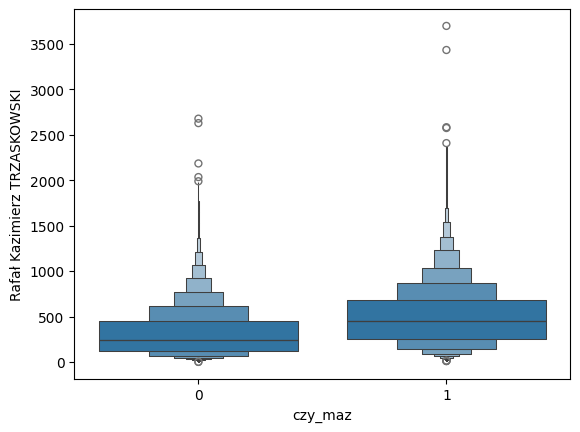

In [168]:
sns.boxenplot(data = turn2, x='czy_maz', y='Rafał Kazimierz TRZASKOWSKI')

In [169]:
results_2020.query("turn=='2'").groupby(['czy_maz', 'populatio_category'])['Rafał Kazimierz TRZASKOWSKI'].mean()

C:\Users\kgrab\AppData\Local\Temp\ipykernel_55828\2840448375.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_2020.query("turn=='2'").groupby(['czy_maz', 'populatio_category'])['Rafał Kazimierz TRZASKOWSKI'].mean()


czy_maz  populatio_category
0        do 20k                210.686205
         20k - 100k            428.425119
         100k - 500k           605.492785
         pow. 500k             851.588435
1        do 20k                304.211387
         20k - 100k            516.457364
         100k - 500k           701.255827
         pow. 500k             781.482835
Name: Rafał Kazimierz TRZASKOWSKI, dtype: Float64

In [170]:
results_2020.query("turn=='2'").groupby(['czy_maz', 'populatio_category'])['Rafał Kazimierz TRZASKOWSKI'].median()

C:\Users\kgrab\AppData\Local\Temp\ipykernel_55828\2262037252.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results_2020.query("turn=='2'").groupby(['czy_maz', 'populatio_category'])['Rafał Kazimierz TRZASKOWSKI'].median()


czy_maz  populatio_category
0        do 20k                158.0
         20k - 100k            406.0
         100k - 500k           557.0
         pow. 500k             840.0
1        do 20k                240.0
         20k - 100k            481.0
         100k - 500k           652.5
         pow. 500k             748.0
Name: Rafał Kazimierz TRZASKOWSKI, dtype: Float64

In [171]:
#correlation between Trzaskowski and trust tee
pearsonr(turn2['Rafał Kazimierz TRZASKOWSKI'], turn2['czy_maz'])

PearsonRResult(statistic=np.float64(0.29212634017928923), pvalue=np.float64(0.0))

In [172]:
ttest_ind(turn2.query("czy_maz==0")['Rafał Kazimierz TRZASKOWSKI'], turn2.query("czy_maz==1")['Rafał Kazimierz TRZASKOWSKI'])

TtestResult(statistic=np.float64(-48.71044203189549), pvalue=np.float64(0.0), df=np.float64(25431.0))

In [174]:
turn2['sr_glosy_niewaz_wojew_kat'] = turn2.groupby(['Województwo','populatio_category'])['proc_niewaznych_glosow'].transform('mean')

C:\Users\kgrab\AppData\Local\Temp\ipykernel_55828\1253404950.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  turn2['sr_glosy_niewaz_wojew_kat'] = turn2.groupby(['Województwo','populatio_category'])['proc_niewaznych_glosow'].transform('mean')
C:\Users\kgrab\AppData\Local\Temp\ipykernel_55828\1253404950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turn2['sr_glosy_niewaz_wojew_kat'] = turn2.groupby(['Województwo','populatio_category'])['proc_niewaznych_glosow'].transform('mean')


In [177]:
turn2_invalid_votes = turn2[turn2['proc_niewaznych_glosow'] > turn2['sr_glosy_niewaz_wojew_kat']].sample(1500, random_state=2137)

In [178]:
turn2_invalid_votes['trzask_proc'] = turn2_invalid_votes['Rafał Kazimierz TRZASKOWSKI']/turn2_invalid_votes['Liczba głosów ważnych oddanych łącznie na wszystkich kandydatów']

<Axes: xlabel='proc_x_multi', ylabel='trzask_proc'>

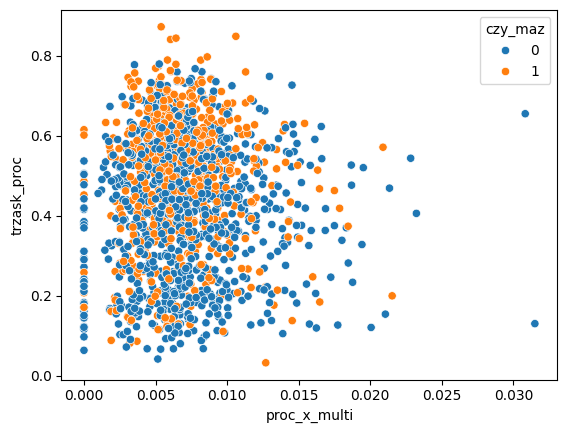

In [179]:
sns.scatterplot(data=turn2_invalid_votes, x='proc_x_multi', y='trzask_proc', hue='czy_maz')